## Tutorial para detecção de stress
### Link dos dados puros: https://onedrive.live.com/?authkey=%21ABnmv%2DCTj0X3TpQ&id=C2AB9C8D5071989A%21112360&cid=C2AB9C8D5071989A
### Link dos dados tratados: https://dataespresso.com/en/2019/01/30/Stress-detection-with-wearable-devices-and-Machine-Learning/

In [83]:
import pandas as pd
import numpy as np
import glob

from tpot import TPOTClassifier # conda install -c conda-forge tpot
from sklearn.model_selection import train_test_split
from scipy import signal
from matplotlib import pyplot as plt
%matplotlib inline 

In [84]:
# leitura da base tratada
df = pd.read_csv("datasets/dataframe_hrv.csv")

In [85]:
df.head()

,ECG,EMG,HR,RESP,Seconds,footGSR,handGSR,interval in seconds,marker,newtime,...,AVNN,SDNN,RMSSD,pNN50,TP,ULF,VLF,LF,HF,LF_HF
0,-0.001974,-0.004737,77.815789,10.801842,12.529684,2.417132,10.889447,0.614632,NaN,12.529684,...,0.617297,3.558630e-02,0.015203,0.055556,0.001238,0.0,0.000696,0.000407,0.000135,3.00200
1,0.002935,-0.004457,101.978261,10.750609,30.503500,2.417109,11.251065,0.647826,NaN,30.503500,...,0.647889,1.354660e-02,0.013858,0.045455,0.000144,0.0,0.000009,0.000060,0.000075,0.79371
2,0.006745,-0.003426,104.957447,10.557234,52.523021,2.226872,11.379638,0.646383,NaN,52.523021,...,0.645000,2.240000e-08,0.000000,0.000000,NaN,0.0,NaN,NaN,NaN,NaN
3,-0.004043,-0.002532,87.702128,10.640128,74.402170,2.173021,11.470830,0.645000,NaN,74.402170,...,0.645000,2.240000e-08,0.000000,0.000000,NaN,0.0,NaN,NaN,NaN,NaN
4,0.012745,-0.004426,88.829787,10.699319,96.219617,2.017106,11.135255,0.645000,NaN,96.219617,...,0.645000,2.240000e-08,0.000000,0.000000,NaN,0.0,NaN,NaN,NaN,NaN


In [86]:
df = df.reset_index(drop = True)

In [87]:
df.head()

,ECG,EMG,HR,RESP,Seconds,footGSR,handGSR,interval in seconds,marker,newtime,...,AVNN,SDNN,RMSSD,pNN50,TP,ULF,VLF,LF,HF,LF_HF
0,-0.001974,-0.004737,77.815789,10.801842,12.529684,2.417132,10.889447,0.614632,NaN,12.529684,...,0.617297,3.558630e-02,0.015203,0.055556,0.001238,0.0,0.000696,0.000407,0.000135,3.00200
1,0.002935,-0.004457,101.978261,10.750609,30.503500,2.417109,11.251065,0.647826,NaN,30.503500,...,0.647889,1.354660e-02,0.013858,0.045455,0.000144,0.0,0.000009,0.000060,0.000075,0.79371
2,0.006745,-0.003426,104.957447,10.557234,52.523021,2.226872,11.379638,0.646383,NaN,52.523021,...,0.645000,2.240000e-08,0.000000,0.000000,NaN,0.0,NaN,NaN,NaN,NaN
3,-0.004043,-0.002532,87.702128,10.640128,74.402170,2.173021,11.470830,0.645000,NaN,74.402170,...,0.645000,2.240000e-08,0.000000,0.000000,NaN,0.0,NaN,NaN,NaN,NaN
4,0.012745,-0.004426,88.829787,10.699319,96.219617,2.017106,11.135255,0.645000,NaN,96.219617,...,0.645000,2.240000e-08,0.000000,0.000000,NaN,0.0,NaN,NaN,NaN,NaN


In [88]:
janela = 30

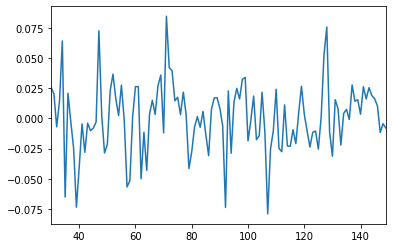

In [89]:
# exemplo de plot
df.ECG[janela:janela*5].plot()

In [90]:
# visualizar todas as colunas utilizadas
df.columns

Index(['ECG', 'EMG', 'HR', 'RESP', 'Seconds', 'footGSR', 'handGSR',
       'interval in seconds', 'marker', 'newtime', 'stress', 'time', 'NNRR',
       'AVNN', 'SDNN', 'RMSSD', 'pNN50', 'TP', 'ULF', 'VLF', 'LF', 'HF',
       'LF_HF'],
      dtype='object')

In [91]:
# funcao para checar se a rotulagem de stress estah correta
def fix_stress_labels(df='', colum = 'stress'):
    df['stress'] = np.where(df['stress'] >=0.5, 1, 0)
    display(df.stress.unique())
    return df

In [92]:
df = fix_stress_labels(df)

array([0, 1])

In [93]:
df

,ECG,EMG,HR,RESP,Seconds,footGSR,handGSR,interval in seconds,marker,newtime,...,AVNN,SDNN,RMSSD,pNN50,TP,ULF,VLF,LF,HF,LF_HF
0,-0.001974,-0.004737,77.815789,10.801842,12.529684,2.417132,10.889447,0.614632,NaN,12.529684,...,0.617297,3.558630e-02,0.015203,0.055556,0.001238,0.000000,0.000696,0.000407,0.000135,3.00200
1,0.002935,-0.004457,101.978261,10.750609,30.503500,2.417109,11.251065,0.647826,NaN,30.503500,...,0.647889,1.354660e-02,0.013858,0.045455,0.000144,0.000000,0.000009,0.000060,0.000075,0.79371
2,0.006745,-0.003426,104.957447,10.557234,52.523021,2.226872,11.379638,0.646383,NaN,52.523021,...,0.645000,2.240000e-08,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN
3,-0.004043,-0.002532,87.702128,10.640128,74.402170,2.173021,11.470830,0.645000,NaN,74.402170,...,0.645000,2.240000e-08,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN
4,0.012745,-0.004426,88.829787,10.699319,96.219617,2.017106,11.135255,0.645000,NaN,96.219617,...,0.645000,2.240000e-08,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4124,0.235263,0.424921,67.263158,33.493789,1384.599395,1.352105,5.373237,0.870763,9.597576,69562.420500,...,0.869892,8.546400e-02,0.045648,0.083333,0.096370,0.096370,0.000000,0.000000,0.000000,NaN
4125,0.266158,0.438684,69.500000,33.406211,1405.522816,1.361316,5.372211,0.877605,9.601515,69583.343920,...,0.876919,6.689060e-02,0.032167,0.027778,0.059283,0.059283,0.000000,0.000000,0.000000,NaN
4126,0.199139,0.411472,68.972222,33.246056,1423.220333,1.417806,5.706972,0.912306,9.603871,69027.154060,...,0.912571,8.870620e-02,0.045629,0.058824,0.090722,0.090722,0.000000,0.000000,0.000000,NaN
4127,0.247811,0.423108,67.189189,33.370378,1443.257216,1.370865,5.494568,0.908541,9.590312,69341.889860,...,0.906889,1.102240e-01,0.044973,0.057143,0.153265,0.153265,0.000000,0.000000,0.000000,NaN


In [94]:
# Limpeza de dados e complemento das informacoes dos 'missing values' com a media
def missing_values(df=''):
    df.reset_index(inplace=True)
    df.replace([np.inf, -np.inf], np.nan, inplace=True) # coluna com valor nula serah completada com nan
    df[~np.isfinite(df)] = np.nan # onde for true, completa com 'nan'
#     display("antes, com valores nan")
    df.plot(y=["HR"], title = "Com valores NaN") 
    df.HR.fillna((df['HR'].mean()), inplace=True) # completa os compos vazios de HR com seu valor medio
    df['HR'] = signal.medfilt(df['HR'],13)
#     display("depois, com valores preenchidos pela media")
    df.plot(y=["HR"], title = "Com vals preenchidos pela media") 
    
    df.fillna(df.mean(),inplace=True) # generaliza o preenchimento dos vals. para todas as colunas com nan
    return df

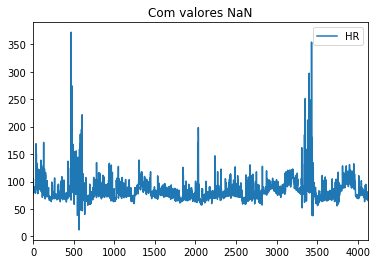

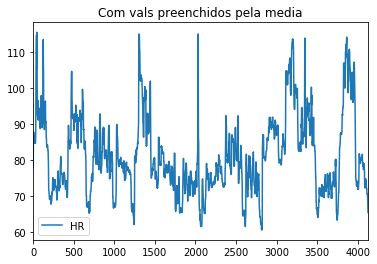

In [95]:
df = missing_values(df)

### Remoção das Features e Seleção

In [96]:
selected_x_columns = ['HR','interval in seconds','AVNN', 'RMSSD', 'pNN50', 'TP', 'ULF', 'VLF', 'LF', 'HF','LF_HF']
X = df[selected_x_columns]
y = df['stress']

### Alg. de Aprendizagem de Máquina e alg. evolucionário

In [97]:
def do_tpot(gen = 5, population_size = 10, X = '', y = ''):
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = .8, test_size = .2)
    tpot_clas = TPOTClassifier(generations=gen, population_size=population_size, verbosity=2,cv=3)
    tpot_clas.fit(X_train, y_train)
    print("Score: {0}".format(tpot_clas.score(X_test, y_test)))
    tpot_clas.export('tpot_pipeline_sec.py')
    return tpot_clas

In [98]:
tpot_clas = do_tpot(5, 20, X,y)

Generation 1 - Current best internal CV score: 0.7547683923705722
Generation 2 - Current best internal CV score: 0.7547683923705722
Generation 3 - Current best internal CV score: 0.7571904329397517
Generation 4 - Current best internal CV score: 0.7584014532243416
Generation 5 - Current best internal CV score: 0.7584014532243416

Best pipeline: KNeighborsClassifier(FeatureAgglomeration(input_matrix, affinity=l2, linkage=average), n_neighbors=69, p=1, weights=distance)
Score: 0.7953995157384988


### Teste de classificação

Obs.: Os intervalos RR de cada amostra foram plotados, e os segmentos marcados como estresse do modelo foram anotados em vermelho, enquanto os segmentos durante o movimento registrados no dispositivo Fitbit foram marcados em verde.

Os arquivos para teste podem ser obtidos publicamente, disponibilizados no <a href="https://github.com/Hygo/Stress_classifier_with_AutoML_and_wearable_devices"> Git </a>, mesmo que os arquivos não estejam rotulados.  

In [99]:
from itertools import cycle, islice

def plotFitBitReader(dfnewHRV = '', predictor = 'none', sel_x_cols=''):
    dfnewHRV = missing_values(dfnewHRV)
    dfnewPol = dfnewHRV[sel_x_cols].fillna(0)
    
    #     print(dfnewPol.columns)
    #     print(dfnewPol.shape)
    pred = predictor.predict_proba(dfnewPol)
    
    dfpred = pd.DataFrame(pred)
    
    dfpred.columns = ["FALSE", "TRUE"] # Add o nome as colunas (0,1) vindo com os resultados da var pred
    dfpred['stress'] = np.where(dfpred["TRUE"] > 0.5,1,np.nan)
    
    dfnewHRV["stress"] = dfpred["stress"]
    
    # seta para nan as linhas da columa stress, onde ["steps"] correspondentes forem maior que 0
    dfnewHRV.loc[dfnewHRV["steps"] > 0, 'stress'] = np.nan
    
    #marca os picos RR como picos de stresse
    dfnewHRV.loc[dfnewHRV["stress"] == 1, 'stress'] = dfnewHRV['interval in seconds']
    dfnewHRV.loc[dfnewHRV["stress"] > 0, 'moving'] = dfnewHRV['interval in seconds']
    dfnewHRV["minutos"] = (dfnewHRV['newtime']/60)/1000

    cores = list(islice(cycle(['b', 'r', 'y', 'k']), None, len(dfnewHRV)))
    plot = dfnewHRV.plot(x="minutos", y=["interval in seconds","stress", "moving"],color=cores)
    
    fig = plot.get_figure()

In [100]:
files = glob.glob('datasets/Vikings/*.csv')
files

['datasets/Vikings/intraday_fitbit.csv',
 'datasets/Vikings/dfnewHRV_Female_24_years_old.csv']

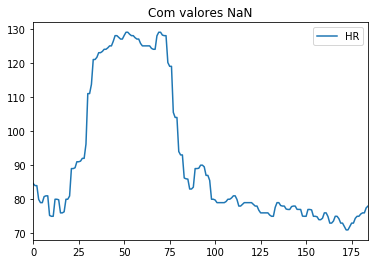

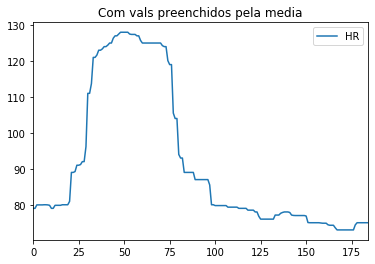

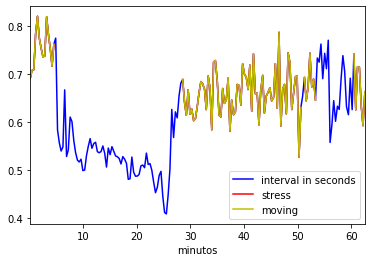

In [101]:
input_df = pd.read_csv(files[1])
plotFitBitReader(input_df,tpot_clas, selected_x_columns)